In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
#from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)

In [2]:
#conda install -c anaconda py-xgboost

In [3]:
#pip install xgboost

In [4]:
#conda install -c conda-forge xgboost

In [5]:
#pip install plotly

# Step 1 : Data Understanding, Preparation, and Pre-Processing :

In [6]:
# loading the dataset
# Reading Train Data Set
df_churn = pd.read_csv("train.csv")
# Reading Test Data Set
df_churn_test = pd.read_csv("test.csv")

In [7]:
pd.get_option('display.max_rows')

60

In [8]:
#reading the dataset
def_max_rows = pd.get_option('display.max_rows')
pd.set_option('display.max_rows', 172)
df_churn.head(100).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
circle_id,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109
loc_og_t2o_mou,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std_og_t2o_mou,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
loc_ic_t2o_mou,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
last_date_of_month_6,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014
last_date_of_month_7,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014

In [9]:
pd.set_option('display.max_rows', def_max_rows)

In [10]:
#checking shape of dataset
print("Traning Set Dimension :", df_churn.shape)
print("Test Set Dimension :", df_churn_test.shape)

Traning Set Dimension : (69999, 172)
Test Set Dimension : (30000, 171)


In [11]:
#checking info of dataset
df_churn.info("show_counts=True")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

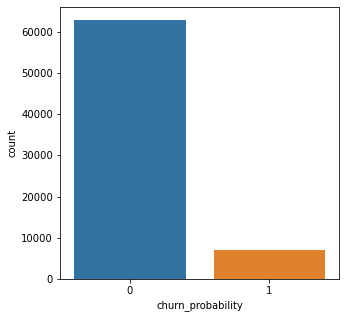

In [12]:
plt.figure(figsize=(5, 5))
sns.countplot(x=df_churn['churn_probability'])
plt.show()

In [13]:
print('churn_probability : {0}%'.format(round(((sum(df_churn['churn_probability'])/len(df_churn['churn_probability']))*100),2)))

churn_probability : 10.19%


<AxesSubplot:xlabel='aon_group'>

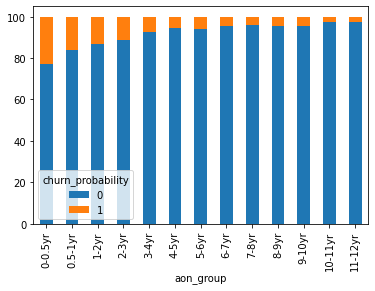

In [14]:
df_churn["aon_group"] = pd.cut(df_churn["aon"],[0,180,365,730,1095,1460,1825,2190,2555,2920,3285,3650,4015,4380], precision=0, 
    labels=['0-0.5yr','0.5-1yr','1-2yr','2-3yr','3-4yr','4-5yr','5-6yr','6-7yr','7-8yr','8-9yr','9-10yr','10-11yr','11-12yr'])

(df_churn.groupby('aon_group')['churn_probability'].value_counts(normalize=True).unstack('churn_probability')*100).plot.bar(stacked=True)

In [15]:
df_churn.drop('aon_group', axis=1, inplace = True)

In [16]:
for col in df_churn.columns:
    if df_churn[col].nunique() == 1:
        print("All values are same in column", col)
        print("Dropped the column",col)
        df_churn.drop(col, axis=1, inplace = True)

print("\nAfter Dropping column with single value: Train DataSet Dimension:",df_churn.shape)

All values are same in column circle_id
Dropped the column circle_id
All values are same in column loc_og_t2o_mou
Dropped the column loc_og_t2o_mou
All values are same in column std_og_t2o_mou
Dropped the column std_og_t2o_mou
All values are same in column loc_ic_t2o_mou
Dropped the column loc_ic_t2o_mou
All values are same in column last_date_of_month_6
Dropped the column last_date_of_month_6
All values are same in column last_date_of_month_7
Dropped the column last_date_of_month_7
All values are same in column last_date_of_month_8
Dropped the column last_date_of_month_8
All values are same in column std_og_t2c_mou_6
Dropped the column std_og_t2c_mou_6
All values are same in column std_og_t2c_mou_7
Dropped the column std_og_t2c_mou_7
All values are same in column std_og_t2c_mou_8
Dropped the column std_og_t2c_mou_8
All values are same in column std_ic_t2o_mou_6
Dropped the column std_ic_t2o_mou_6
All values are same in column std_ic_t2o_mou_7
Dropped the column std_ic_t2o_mou_7
All va

In [17]:
for col in df_churn_test.columns:
    if df_churn_test[col].nunique() == 1:
        print("All values are same in column", col)
        print("Dropped the column",col)
        df_churn_test.drop(col, axis=1, inplace = True)

print("\nAfter Dropping column with single value: Test DataSet Dimension:",df_churn_test.shape)

All values are same in column circle_id
Dropped the column circle_id
All values are same in column loc_og_t2o_mou
Dropped the column loc_og_t2o_mou
All values are same in column std_og_t2o_mou
Dropped the column std_og_t2o_mou
All values are same in column loc_ic_t2o_mou
Dropped the column loc_ic_t2o_mou
All values are same in column last_date_of_month_6
Dropped the column last_date_of_month_6
All values are same in column last_date_of_month_7
Dropped the column last_date_of_month_7
All values are same in column last_date_of_month_8
Dropped the column last_date_of_month_8
All values are same in column std_og_t2c_mou_6
Dropped the column std_og_t2c_mou_6
All values are same in column std_og_t2c_mou_7
Dropped the column std_og_t2c_mou_7
All values are same in column std_og_t2c_mou_8
Dropped the column std_og_t2c_mou_8
All values are same in column std_ic_t2o_mou_6
Dropped the column std_ic_t2o_mou_6
All values are same in column std_ic_t2o_mou_7
Dropped the column std_ic_t2o_mou_7
All va

In [18]:
#Dropping the column related to recharge date as seems they are not meaninful in model.
col_date = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
            'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']
for col in col_date:
    print("Dropped the column",col)
    df_churn.drop(col, axis=1, inplace = True)

print("\nAfter Dropping column with recharge date: Train DataSet Dimension:",df_churn.shape)

Dropped the column date_of_last_rech_6
Dropped the column date_of_last_rech_7
Dropped the column date_of_last_rech_8
Dropped the column date_of_last_rech_data_6
Dropped the column date_of_last_rech_data_7
Dropped the column date_of_last_rech_data_8

After Dropping column with recharge date: Train DataSet Dimension: (69999, 153)


In [19]:
#Dropping the column related to recharge date as seems they are not meaninful in model.
col_date = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
            'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']
for col in col_date:
    print("Dropped the column",col)
    df_churn_test.drop(col, axis=1, inplace = True)

print("\nAfter Dropping column with recharge date: Test DataSet Dimension:",df_churn_test.shape)

Dropped the column date_of_last_rech_6
Dropped the column date_of_last_rech_7
Dropped the column date_of_last_rech_8
Dropped the column date_of_last_rech_data_6
Dropped the column date_of_last_rech_data_7
Dropped the column date_of_last_rech_data_8

After Dropping column with recharge date: Test DataSet Dimension: (30000, 152)


In [20]:
#=============================================================================================

In [21]:
# After inspecting the column of Dataset : Following are the categorical variable.
categorical_columns = [
    'total_rech_num_6',
    'total_rech_num_7',
    'total_rech_num_8',
    'total_rech_data_6',
    'total_rech_data_7',
    'total_rech_data_8',
    'count_rech_2g_6',
    'count_rech_2g_7',
    'count_rech_2g_8',
    'count_rech_3g_6',
    'count_rech_3g_7',
    'count_rech_3g_8',
    'monthly_2g_6',
    'monthly_2g_7',
    'monthly_2g_8',
    'sachet_2g_6',
    'sachet_2g_7',
    'sachet_2g_8',
    'monthly_3g_6',
    'monthly_3g_7',
    'monthly_3g_8',
    'sachet_3g_6',
    'sachet_3g_7',
    'sachet_3g_8',
    'night_pck_user_6',
    'night_pck_user_7',
    'night_pck_user_8',
    'fb_user_6',
    'fb_user_7',
    'fb_user_8',
]
print("Categorical Column in DataSet:", categorical_columns)

Categorical Column in DataSet: ['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']


In [22]:
df_churn[categorical_columns].head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
total_rech_num_6,3.0,3.0,2.0,2.0,13.0,9.0,3.0,2.0,2.0,4.0,8.0,10.0,15.0,6.0,7.0,5.0,3.0,3.0,4.0,12.0
total_rech_num_7,2.0,4.0,4.0,4.0,10.0,8.0,2.0,3.0,3.0,3.0,3.0,6.0,10.0,8.0,3.0,3.0,6.0,3.0,6.0,6.0
total_rech_num_8,2.0,5.0,2.0,3.0,8.0,10.0,3.0,2.0,1.0,2.0,1.0,8.0,20.0,6.0,2.0,4.0,4.0,4.0,6.0,12.0
total_rech_data_6,NaN,NaN,NaN,NaN,7.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
total_rech_data_7,NaN,1.0,NaN,NaN,7.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_rech_data_8,NaN,NaN,NaN,NaN,6.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
count_rech_2g_6,NaN,NaN,NaN,NaN,7.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN
count_rech_2g_7,NaN,0.0,NaN,NaN,6.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
count_rech_2g_8,NaN,NaN,NaN,NaN,6.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
count_rech_3g_6,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN


In [23]:
print("As total_rech_data_6/7/8 is sum of count_rech_2g/3g_6/7/8, so dropping count_rech_2g/3g_6/7/8 columns")
# Dropping from Train DataSet
df_churn.drop(['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8'], axis=1, inplace = True)
df_churn.drop(['count_rech_3g_6','count_rech_3g_7','count_rech_3g_8'], axis=1, inplace = True)
# Dropping from Test DataSet
df_churn_test.drop(['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8'], axis=1, inplace = True)
df_churn_test.drop(['count_rech_3g_6','count_rech_3g_7','count_rech_3g_8'], axis=1, inplace = True)

As total_rech_data_6/7/8 is sum of count_rech_2g/3g_6/7/8, so dropping count_rech_2g/3g_6/7/8 columns


In [24]:
print("As total_rech_data_6/7/8 is sum of monthly_2g/3g_6/7/8, so dropping monthly_2g/3g_6/7/8 columns")
# Dropping from Train DataSet
df_churn.drop(['monthly_2g_6','monthly_2g_7','monthly_2g_8'], axis=1, inplace = True)
df_churn.drop(['monthly_3g_6','monthly_3g_7','monthly_3g_8'], axis=1, inplace = True)
# Dropping from Test DataSet
df_churn_test.drop(['monthly_2g_6','monthly_2g_7','monthly_2g_8'], axis=1, inplace = True)
df_churn_test.drop(['monthly_3g_6','monthly_3g_7','monthly_3g_8'], axis=1, inplace = True)

As total_rech_data_6/7/8 is sum of monthly_2g/3g_6/7/8, so dropping monthly_2g/3g_6/7/8 columns


In [25]:
print("As total_rech_data_6/7/8 is sum of sachet_2g/3g_6/7/8, so dropping sachet_2g/3g_6/7/8 columns")
# Dropping from Train DataSet
df_churn.drop(['sachet_2g_6','sachet_2g_7','sachet_2g_8'], axis=1, inplace = True)
df_churn.drop(['sachet_3g_6','sachet_3g_7','sachet_3g_8'], axis=1, inplace = True)
# Dropping from Test DataSet
df_churn_test.drop(['sachet_2g_6','sachet_2g_7','sachet_2g_8'], axis=1, inplace = True)
df_churn_test.drop(['sachet_3g_6','sachet_3g_7','sachet_3g_8'], axis=1, inplace = True)

As total_rech_data_6/7/8 is sum of sachet_2g/3g_6/7/8, so dropping sachet_2g/3g_6/7/8 columns


In [26]:
print("\nAfter Dropping column with recharge date: Train DataSet Dimension:",df_churn.shape)
print("\nAfter Dropping column with recharge date: Test DataSet Dimension:",df_churn_test.shape)


After Dropping column with recharge date: Train DataSet Dimension: (69999, 135)

After Dropping column with recharge date: Test DataSet Dimension: (30000, 134)


In [27]:
#After dropping few Categorical column following is the Categorical columns will be used for model building.
categorical_columns = [
    'total_rech_num_6',
    'total_rech_num_7',
    'total_rech_num_8',
    'total_rech_data_6',
    'total_rech_data_7',
    'total_rech_data_8',    
    'night_pck_user_6',
    'night_pck_user_7',
    'night_pck_user_8',
    'fb_user_6',
    'fb_user_7',
    'fb_user_8',
]
df_churn[categorical_columns].head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
total_rech_num_6,3.0,3.0,2.0,2.0,13.0,9.0,3.0,2.0,2.0,4.0,8.0,10.0,15.0,6.0,7.0,5.0,3.0,3.0,4.0,12.0
total_rech_num_7,2.0,4.0,4.0,4.0,10.0,8.0,2.0,3.0,3.0,3.0,3.0,6.0,10.0,8.0,3.0,3.0,6.0,3.0,6.0,6.0
total_rech_num_8,2.0,5.0,2.0,3.0,8.0,10.0,3.0,2.0,1.0,2.0,1.0,8.0,20.0,6.0,2.0,4.0,4.0,4.0,6.0,12.0
total_rech_data_6,NaN,NaN,NaN,NaN,7.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
total_rech_data_7,NaN,1.0,NaN,NaN,7.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_rech_data_8,NaN,NaN,NaN,NaN,6.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
night_pck_user_6,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
night_pck_user_7,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
night_pck_user_8,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
fb_user_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN


In [28]:
#checking null percentage of each categorical feature in dataset
null_percentage_Of_Columns_categorcal = df_churn[categorical_columns].isnull().sum()/len(df_churn[categorical_columns])*100
null_percentage_Of_Columns_categorcal = null_percentage_Of_Columns_categorcal[null_percentage_Of_Columns_categorcal>0]
null_percentage_Of_Columns_categorcal.sort_values(inplace=True, ascending=False)
null_percentage_Of_Columns_categorcal

total_rech_data_6    74.902499
night_pck_user_6     74.902499
fb_user_6            74.902499
total_rech_data_7    74.478207
night_pck_user_7     74.478207
fb_user_7            74.478207
total_rech_data_8    73.689624
night_pck_user_8     73.689624
fb_user_8            73.689624
dtype: float64

In [29]:
# Missing value imputation for categorical variable.
#Train DataSet
df_churn[categorical_columns] = df_churn[categorical_columns].fillna(0)
#Test DataSet
df_churn_test[categorical_columns] = df_churn_test[categorical_columns].fillna(0)

#checking again null percentage of each categorical feature in dataset
null_percentage_Of_Columns_categorcal = df_churn[categorical_columns].isnull().sum()/len(df_churn[categorical_columns])*100
null_percentage_Of_Columns_categorcal = null_percentage_Of_Columns_categorcal[null_percentage_Of_Columns_categorcal>0]
null_percentage_Of_Columns_categorcal.sort_values(inplace=True, ascending=False)
null_percentage_Of_Columns_categorcal

Series([], dtype: float64)

<AxesSubplot:>

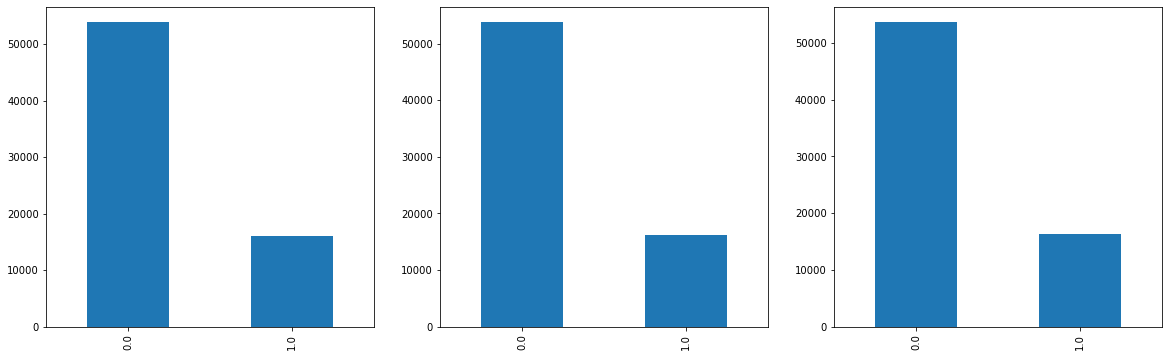

In [30]:
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
df_churn['fb_user_6'].value_counts().plot.bar()
plt.subplot(3,3,2)
df_churn['fb_user_7'].value_counts().plot.bar()
plt.subplot(3,3,3)
df_churn['fb_user_8'].value_counts().plot.bar()

<AxesSubplot:xlabel='fb_user_6'>

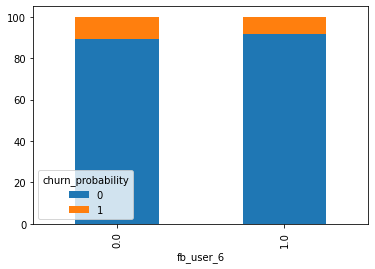

In [31]:
(df_churn.groupby('fb_user_6')['churn_probability'].value_counts(normalize=True).unstack('churn_probability')*100).plot.bar(stacked=True)

<AxesSubplot:xlabel='fb_user_7'>

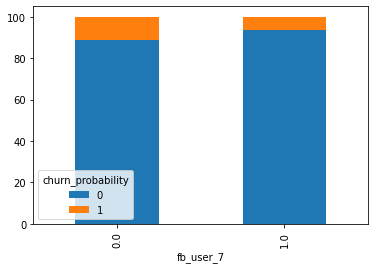

In [32]:
(df_churn.groupby('fb_user_7')['churn_probability'].value_counts(normalize=True).unstack('churn_probability')*100).plot.bar(stacked=True)

<AxesSubplot:xlabel='fb_user_8'>

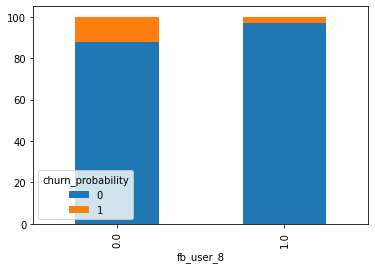

In [33]:
(df_churn.groupby('fb_user_8')['churn_probability'].value_counts(normalize=True).unstack('churn_probability')*100).plot.bar(stacked=True)

<AxesSubplot:>

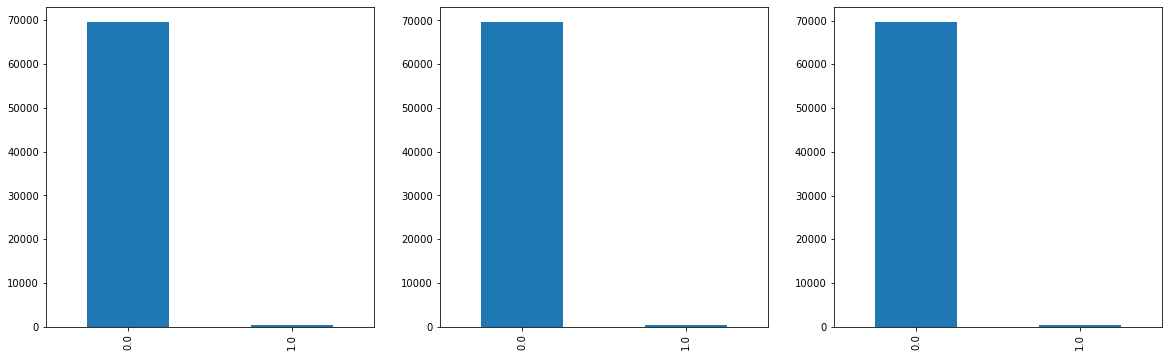

In [34]:
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
df_churn['night_pck_user_6'].value_counts().plot.bar()
plt.subplot(3,3,2)
df_churn['night_pck_user_7'].value_counts().plot.bar()
plt.subplot(3,3,3)
df_churn['night_pck_user_8'].value_counts().plot.bar()

<AxesSubplot:xlabel='night_pck_user_6'>

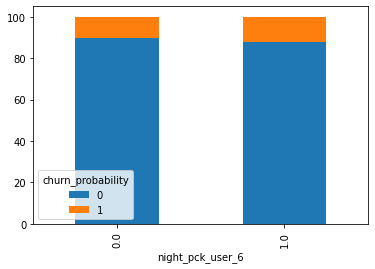

In [35]:
(df_churn.groupby('night_pck_user_6')['churn_probability'].value_counts(normalize=True).unstack('churn_probability')*100).plot.bar(stacked=True)

<AxesSubplot:xlabel='night_pck_user_7'>

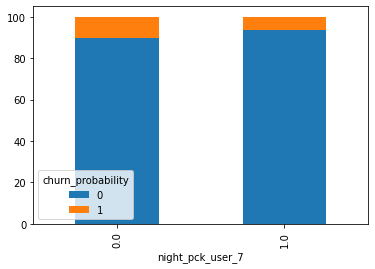

In [36]:
(df_churn.groupby('night_pck_user_7')['churn_probability'].value_counts(normalize=True).unstack('churn_probability')*100).plot.bar(stacked=True)

<AxesSubplot:xlabel='night_pck_user_8'>

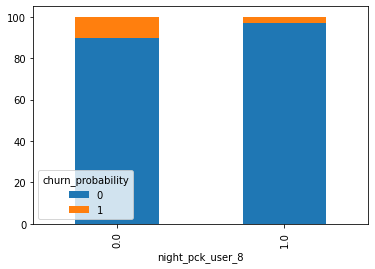

In [37]:
(df_churn.groupby('night_pck_user_8')['churn_probability'].value_counts(normalize=True).unstack('churn_probability')*100).plot.bar(stacked=True)

<AxesSubplot:xlabel='total_rech_data_6'>

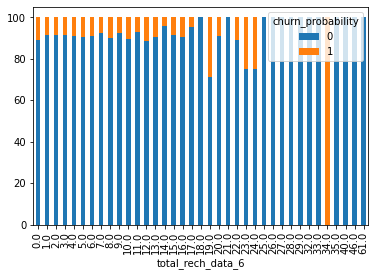

In [38]:
#plt.figure(figsize=(20, 20),  dpi=80)

(df_churn.groupby('total_rech_data_6')['churn_probability'].value_counts(normalize=True).unstack('churn_probability')*100).plot.bar(stacked=True)
#plt.show()

<AxesSubplot:xlabel='total_rech_data_7'>

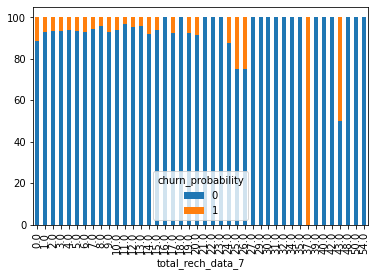

In [39]:
(df_churn.groupby('total_rech_data_7')['churn_probability'].value_counts(normalize=True).unstack('churn_probability')*100).plot.bar(stacked=True)

<AxesSubplot:xlabel='total_rech_data_8'>

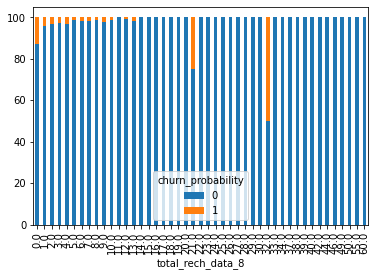

In [40]:
(df_churn.groupby('total_rech_data_8')['churn_probability'].value_counts(normalize=True).unstack('churn_probability')*100).plot.bar(stacked=True)

In [41]:
numerical_columns = df_churn.select_dtypes(include=['int64','float']).columns
#Remove the categorical column
numerical_columns=numerical_columns.drop(categorical_columns)
#Remove the Target variable
numerical_columns=numerical_columns.drop('churn_probability')
numerical_columns

Index(['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       ...
       'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g'], dtype='object', length=122)

In [42]:
#checking null percentage of each feature in dataset
null_percentage_Of_Columns = df_churn[numerical_columns].isnull().sum()/len(df_churn[numerical_columns])*100
null_percentage_Of_Columns = null_percentage_Of_Columns[null_percentage_Of_Columns>0]
null_percentage_Of_Columns.sort_values(inplace=True, ascending=False)
null_percentage_Of_Columns

max_rech_data_6       74.902499
arpu_2g_6             74.902499
av_rech_amt_data_6    74.902499
arpu_3g_6             74.902499
av_rech_amt_data_7    74.478207
                        ...    
spl_og_mou_7           3.838626
loc_ic_t2f_mou_7       3.838626
onnet_mou_7            3.838626
loc_ic_t2m_mou_7       3.838626
og_others_7            3.838626
Length: 93, dtype: float64

In [43]:
#checking null percentage of each feature in dataset
null_percentage_Of_Columns_30 = df_churn[numerical_columns].isnull().sum()/len(df_churn[numerical_columns])*100
null_percentage_Of_Columns_30 = null_percentage_Of_Columns_30[null_percentage_Of_Columns_30>30]
null_percentage_Of_Columns_30.sort_values(inplace=True, ascending=False)
null_percentage_Of_Columns_30

max_rech_data_6       74.902499
av_rech_amt_data_6    74.902499
arpu_3g_6             74.902499
arpu_2g_6             74.902499
max_rech_data_7       74.478207
av_rech_amt_data_7    74.478207
arpu_3g_7             74.478207
arpu_2g_7             74.478207
max_rech_data_8       73.689624
av_rech_amt_data_8    73.689624
arpu_3g_8             73.689624
arpu_2g_8             73.689624
dtype: float64

In [44]:
#Train DataSet
df_churn[numerical_columns] = df_churn[numerical_columns].fillna(0)
#Test DataSet
df_churn_test[numerical_columns] = df_churn[numerical_columns].fillna(0)

#checking again null percentage of each numerical feature in dataset
null_percentage_Of_Columns = df_churn[numerical_columns].isnull().sum()/len(df_churn[numerical_columns])*100
null_percentage_Of_Columns = null_percentage_Of_Columns[null_percentage_Of_Columns>0]
null_percentage_Of_Columns.sort_values(inplace=True, ascending=False)
null_percentage_Of_Columns

Series([], dtype: float64)

In [45]:
#null_percentage_Of_Columns = df_churn.isnull().sum()/len(df_churn)*100
#null_percentage_Of_Columns_60percent = null_percentage_Of_Columns[null_percentage_Of_Columns>60]
#null_percentage_Of_Columns_60percent

In [46]:
#for col in null_percentage_Of_Columns_60percent.index:
#    df_churn.drop(col, axis=1, inplace=True)    

In [47]:
#checking shape of dataset
#df_churn.shape

In [48]:
#Ensuring there is no Null in Traning Dataset
null_percentage_Of_Columns = df_churn.isnull().sum()/len(df_churn)*100
null_percentage_Of_Columns = null_percentage_Of_Columns[null_percentage_Of_Columns>0]
null_percentage_Of_Columns.sort_values(inplace=True, ascending=False)
null_percentage_Of_Columns

Series([], dtype: float64)

In [49]:
#Ensuring there is no Null in Test Dataset
null_percentage_Of_Columns = df_churn_test.isnull().sum()/len(df_churn_test)*100
null_percentage_Of_Columns = null_percentage_Of_Columns[null_percentage_Of_Columns>0]
null_percentage_Of_Columns.sort_values(inplace=True, ascending=False)
null_percentage_Of_Columns

Series([], dtype: float64)

In [50]:
df_churn.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1958,0.0,0.0,0.0,0
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,145.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,0.0,122.07,0.0,0.0,122.08,0.0,0.0,0.0,0.0,0.0,1.0,0.0,710,0.0,0.0,0.0,0
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,70,50,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,882,0.0,0.0,0.0,0
3,3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,

In [51]:
df_churn.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,283.134365,278.185912,278.858826,127.887939,128.754731,125.943607,191.010582,189.585401,186.146273,9.379276,6.745305,6.634328,13.625476,9.464386,9.254848,45.050076,44.394344,43.269280,89.551272,87.313796,86.301054,3.595161,3.632045,3.467948,1.081499,1.308807,1.345676,13

In [52]:
df_churn.corr()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
id,1.000000,0.000225,0.003596,0.003855,0.002666,0.006046,0.002643,-0.007596,-0.005083,-0.003990,-0.000091,-0.001986,0.006538,-0.005495,-0.006431,-0.000177,-0.000182,0.004339,0.002469,0.002522,0.003826,0.003857,0.005159,0.001073,0.001059,-0.001637,0.000042,-0.002743,0.001784,0.005163,0.004000,0.003649,0.004627,0.001536,-0.009981,-0.007492,-0.006964,0.003290,0.006350,0.003884,-0.004064,-0.001752,-0.003502,-0.001963,-0.000847,-0.000327,-0.002061,0.002365,-0.001753,-0.003585,-0.004365,0.001259,-0.002642,0.001188,-0.001004,0.004344,0.005114,0.004712,0.002171,0.002921,0.002215,0.000802,0.001632,0.004862,0.003973,0.005123,0.004869,0.001692,0.005859,0.006334,0.001419,0.000425,0.000564,0.005702,0.010052,0.003242,0.002828,0.004625,0.004060,0.006369,0.006972,0.007130,0.004374,0.005307,-0.001622,0.007916,0.003419,0.006188,0.007754,0.003579,0.004496,-0.000283,0.003220,-0.000109,-0.000351,0.003147,0.002825,0.003258,0.005765,0.008881,-0.000441,0.003306,0.004289,-0.001376,0.001462,0.002412,0.003479,0.003311,0.005258,0.001719,0.003070,0.006255,0.004449,-0.003420,0.003472,0.003949,0.004254,0.005560,0.004934,0.002874,0.003400,0.004932,0.003468,0.004281,0.001584,0.002721,0.004012,0.006292,0.003142,0.006872,-0.000702,0.006768,0.004040,0.003071,-0.001669
arpu_6,0.000225,1.000000,0.743730,0.643193,0.450632,0.324784,0.259506,0.616059,0.455762,0.358563,0.132511,0.089524,0.086243,0.235952,0.172643,0.140823,0.237552,0.199410,0.181197,0.435082,0.360952,0.311930,0.190971,0.162799,0.149672,0.070772,0.027451,0.017975,0.431472,0.359189,0.315364,0.363922,0.249171,0.187141,0.386478,0.265942,0.184352,0.088255,0.066865,0.057118,0.490014,0.337046,0.243462,0.414701,0.383877,0.368865,0.124931,0.069070,0.057522,0.049298,0.005663,0.003963,0.667009,0.491677,0.387790,0.112922,0.087877,0.082633,0.243870,0.203490,0.171569,0.073540,0.060840,0.055452,0.236366,0.193148,0.169245,0.106616,0.075673,0.059659,0.115210,0.081091,0.068803,0.039719,0.038005,0.028090,0.147566,0.104563,0.085578,0.274957,0.217625,0.188489,0.038266,-0.079633,-0.051399,0.089464,0.061507,0.0

In [53]:
#Filter High Value Customers for Traning Data Set
df_churn['total_data_rech_amt_6'] = df_churn['total_rech_data_6'] * df_churn['av_rech_amt_data_6']
df_churn['total_data_rech_amt_7'] = df_churn['total_rech_data_7'] * df_churn['av_rech_amt_data_7']
df_churn['total_data_rech_amt_8'] = df_churn['total_rech_data_8'] * df_churn['av_rech_amt_data_8']

# Dropping columns: total_rech_data_6/7/8 and av_rech_amt_data_6/7/8 as we considered in total_data_rech_amt_6/7/8: 
df_churn.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8',
               'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8'],axis = 1,inplace = True)

df_churn['total_rech_6'] = df_churn['total_data_rech_amt_6'] + df_churn['total_rech_amt_6']
df_churn['total_rech_7'] = df_churn['total_data_rech_amt_7'] + df_churn['total_rech_amt_7']
df_churn['total_rech_8'] = df_churn['total_data_rech_amt_8'] + df_churn['total_rech_amt_8']

# Dropping columns: total_rech_data_6/7/8 and av_rech_amt_data_6/7/8 as we considered in total_data_rech_amt_6/7/8: 
df_churn.drop(['total_data_rech_amt_6','total_data_rech_amt_7','total_data_rech_amt_8',
               'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8'],axis = 1,inplace = True)


df_av_rech_6_7_8 = (df_churn['total_rech_6'] + df_churn['total_rech_7'] + df_churn['total_rech_8'])/3
percentile_70_6_7_8 = np.percentile(df_av_rech_6_7_8, 70.0)
print("70 percentile is : ", percentile_70_6_7_8)

#Filtering High Value Customer for Train DataSet
df_churn = df_churn[df_av_rech_6_7_8 >= percentile_70_6_7_8]
print("\nAfter Filtering High Value Customer: Train Set Dimension:",df_churn.shape);

70 percentile is :  484.3333333333333

After Filtering High Value Customer: Train Set Dimension: (21001, 129)


In [54]:
#Filter High Value Customers for Test Data Set
df_churn_test['total_data_rech_amt_6'] = df_churn_test['total_rech_data_6'] * df_churn_test['av_rech_amt_data_6']
df_churn_test['total_data_rech_amt_7'] = df_churn_test['total_rech_data_7'] * df_churn_test['av_rech_amt_data_7']
df_churn_test['total_data_rech_amt_8'] = df_churn_test['total_rech_data_8'] * df_churn_test['av_rech_amt_data_8']

# Dropping columns: total_rech_data_6/7/8 and av_rech_amt_data_6/7/8 as we considered in total_data_rech_amt_6/7/8: 
df_churn_test.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8',
               'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8'],axis = 1,inplace = True)

df_churn_test['total_rech_6'] = df_churn_test['total_data_rech_amt_6'] + df_churn_test['total_rech_amt_6']
df_churn_test['total_rech_7'] = df_churn_test['total_data_rech_amt_7'] + df_churn_test['total_rech_amt_7']
df_churn_test['total_rech_8'] = df_churn_test['total_data_rech_amt_8'] + df_churn_test['total_rech_amt_8']

# Dropping columns: total_rech_data_6/7/8 and av_rech_amt_data_6/7/8 as we considered in total_data_rech_amt_6/7/8: 
df_churn_test.drop(['total_data_rech_amt_6','total_data_rech_amt_7','total_data_rech_amt_8',
               'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8'],axis = 1,inplace = True)


df_av_rech_6_7_8 = (df_churn_test['total_rech_6'] + df_churn_test['total_rech_7'] + df_churn_test['total_rech_8'])/3
percentile_70_6_7_8 = np.percentile(df_av_rech_6_7_8, 70.0)
print("70 percentile is : ", percentile_70_6_7_8)

#Filtering High Value Customer for Train DataSet
#df_churn_test = df_churn_test[df_av_rech_6_7_8 >= percentile_70_6_7_8]
print("\nAfter Filtering High Value Customer: Test Set Dimension:",df_churn_test.shape);

70 percentile is :  388.0

After Filtering High Value Customer: Test Set Dimension: (30000, 128)


In [55]:
#Filtering High Value Customer for Train DataSet
#df_churn = df_churn[df_av_rech_6_7_8 >= percentile_70_6_7_8]

#Filtering High Value Customer for Test DataSet
#df_churn_test = df_churn_test[df_av_rech_6_7_8 >= percentile_70_6_7_8]

#print("\nAfter Filtering High Value Customer: Train Set Dimension:",df_churn.shape, "Test Set Dimension",df_churn_test.shape)

In [56]:
#As total_rech_data_6/7/8 is considerd in total_rech_6/7/8 variable so dropping from Categorcal list.
categorical_columns.remove('total_rech_data_6')
categorical_columns.remove('total_rech_data_7')
categorical_columns.remove('total_rech_data_8')
categorical_columns

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

In [57]:
#Recalculation of numerical_columns
numerical_columns = df_churn.select_dtypes(include=['int64','float']).columns
#Remove the categorical column
numerical_columns=numerical_columns.drop(categorical_columns)
#Remove the Target variable
numerical_columns=numerical_columns.drop('churn_probability')
numerical_columns

Index(['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       ...
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'total_rech_6', 'total_rech_7', 'total_rech_8'], dtype='object', length=119)

In [58]:
for col in numerical_columns:
    q1 = df_churn[col].quantile(0.10)
    q3 = df_churn[col].quantile(0.90)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    #df_churn = df_churn.loc[(df_churn[col] > fence_low) & (df_churn[col] < fence_high)]

In [59]:
#Checking Outliesrs
plt.figure(figsize=(20, 60))
i=1
while i <=12:
    #plt.subplot(12,3,i)
    #sns.boxplot(y = numerical_columns[i], data = df_churn)
    i=i+1
plt.show()

<Figure size 1440x4320 with 0 Axes>

In [60]:
plt.figure(figsize=(20, 60))
i=13
while i <=24:
    #plt.subplot(12,3,i-12)
    #sns.boxplot(y = numerical_columns[i], data = df_churn)
    i=i+1
plt.show()

<Figure size 1440x4320 with 0 Axes>

In [61]:
plt.figure(figsize=(20, 60))
i=25
while i <=36:
    #plt.subplot(12,3,i-24)
    #sns.boxplot(y = numerical_columns[i], data = df_churn)
    i=i+1
plt.show()

<Figure size 1440x4320 with 0 Axes>

In [62]:
plt.figure(figsize=(20, 60))
i=37
while i <=48:
    #plt.subplot(12,3,i-36)
    #sns.boxplot(y = numerical_columns[i], data = df_churn)
    i=i+1
plt.show()

<Figure size 1440x4320 with 0 Axes>

In [63]:
plt.figure(figsize=(20, 60))
i=49
while i <=60:
    #plt.subplot(12,3,i-48)
    #sns.boxplot(y = numerical_columns[i], data = df_churn)
    i=i+1
plt.show()

<Figure size 1440x4320 with 0 Axes>

In [64]:
plt.figure(figsize=(20, 60))
i=61
while i <=72:
    #plt.subplot(12,3,i-60)
    #sns.boxplot(y = numerical_columns[i], data = df_churn)
    i=i+1
plt.show()

<Figure size 1440x4320 with 0 Axes>

In [65]:
plt.figure(figsize=(20, 60))
i=73
while i <=84:
    #plt.subplot(12,3,i-72)
    #sns.boxplot(y = numerical_columns[i], data = df_churn)
    i=i+1
plt.show()

<Figure size 1440x4320 with 0 Axes>

In [66]:
plt.figure(figsize=(20, 60))
i=85
while i <=96:
    #plt.subplot(12,3,i-84)
    #sns.boxplot(y = numerical_columns[i], data = df_churn)
    i=i+1
plt.show()

<Figure size 1440x4320 with 0 Axes>

In [67]:
plt.figure(figsize=(20, 60))
i=97
while i <=108:
    #plt.subplot(12,3,i-96)
    #sns.boxplot(y = numerical_columns[i], data = df_churn)
    i=i+1
plt.show()

<Figure size 1440x4320 with 0 Axes>

In [68]:
plt.figure(figsize=(20, 60))
i=109
while i <=117:
    #plt.subplot(12,3,i-108)
    #sns.boxplot(y = numerical_columns[i], data = df_churn)
    i=i+1
plt.show()

<Figure size 1440x4320 with 0 Axes>

In [69]:
#plt.figure(figsize=(5, 5))
#i=121
#while i <=121:
#    plt.subplot(1,1,i-120)
#    sns.boxplot(y = numerical_columns[i], data = df_churn)
#    i=i+1
plt.show()

In [70]:
cor = df_churn.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor[(cor > 0.60) | (cor < -0.60)].sort_values()

std_og_mou_6    offnet_mou_6        0.600060
arpu_8          arpu_6              0.603791
std_ic_mou_6    std_ic_t2m_mou_7    0.604609
total_ic_mou_7  loc_ic_t2t_mou_7    0.605469
aug_vbc_3g      vol_3g_mb_8         0.605602
                                      ...   
arpu_2g_8       arpu_3g_8           0.931703
isd_og_mou_7    isd_og_mou_6        0.937425
arpu_2g_6       arpu_3g_6           0.938064
arpu_2g_7       arpu_3g_7           0.940022
isd_og_mou_8    isd_og_mou_7        0.951444
Length: 216, dtype: float64

In [71]:
# Drop the column 'id' as it does not add any information
#Train DataSet
df_churn.drop('id', axis=1, inplace=True)
#Test DataSet : Need to store the id as need to append with prediction at the last.
#df_churn_test_id = df_churn_test['id']
df_churn_test_id = pd.DataFrame()
df_churn_test_id['id'] = df_churn_test['id']
df_churn_test.drop('id', axis=1, inplace=True)

#Removing 'id' from the numerical column too.
numerical_columns=numerical_columns.drop('id')

In [72]:
df_churn_test_id.head()

,id
0,0
1,1
2,2
3,3
4,4


In [73]:
print("Final Dimension before Modeling: Train DataSet:", df_churn.shape, " Test DataSet:", df_churn_test.shape)

Final Dimension before Modeling: Train DataSet: (21001, 128)  Test DataSet: (30000, 127)


In [74]:
y = df_churn['churn_probability']
X = df_churn.drop('churn_probability', axis=1)

C:\Users\Uttam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


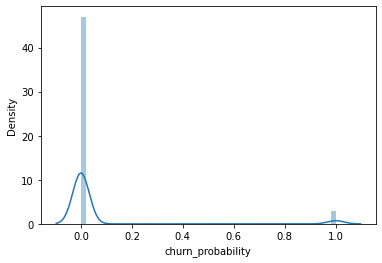

In [75]:
#Handling Class Imbalance
sns.distplot(y)
plt.show()

In [76]:
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

C:\Users\Uttam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


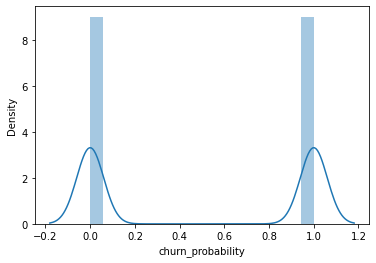

In [77]:
sns.distplot(y)
plt.show()

In [78]:
# Train Test split from train data here Test data actually validation test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [79]:
# Test data here is unseen data from where prediction need to be done.
X_test_unseen = df_churn_test

In [80]:
#Scaling only numerical column.

scaler = StandardScaler()
# Train data to =>Fit_transform
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

# Test data to => transfom
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

X_test_unseen[numerical_columns] = scaler.transform(X_test_unseen[numerical_columns])

# PCA

In [81]:
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

In [82]:
pca.components_

array([[ 1.61397324e-02,  2.29131493e-02,  1.53229835e-02, ...,
         1.10905551e-02,  1.62839348e-02,  1.18327577e-02],
       [-4.72382721e-02,  1.02591626e-02,  5.70336262e-02, ...,
        -3.60627527e-02,  1.33203799e-02,  4.79366893e-02],
       [ 3.21740509e-02, -4.92161798e-02,  4.53095744e-02, ...,
         2.30688495e-02, -5.50946256e-02,  4.11759765e-02],
       ...,
       [-1.42503460e-07,  3.62817583e-07,  1.86121110e-07, ...,
         2.95972518e-08, -7.19230486e-08, -1.30616351e-07],
       [-1.17982464e-07,  8.49533086e-08, -1.59968664e-07, ...,
         4.67764039e-08,  2.72988006e-08, -4.17544923e-08],
       [-1.24338842e-07,  6.74790596e-08, -8.39677002e-08, ...,
        -9.10980172e-10,  1.34934046e-07, -5.72481272e-08]])

In [83]:
pca.explained_variance_ratio_

array([4.86115558e-01, 1.48601954e-01, 6.09947083e-02, 3.31190603e-02,
       2.67620336e-02, 2.01068565e-02, 1.46820193e-02, 1.21287365e-02,
       1.08176797e-02, 8.77964884e-03, 8.26368408e-03, 8.03553506e-03,
       7.71832850e-03, 6.88871752e-03, 6.42904387e-03, 6.32085482e-03,
       5.85626958e-03, 5.63181965e-03, 5.13479250e-03, 5.00678273e-03,
       4.92214068e-03, 4.49059817e-03, 4.40710871e-03, 4.20521368e-03,
       3.85772231e-03, 3.37149964e-03, 3.34125578e-03, 3.31784469e-03,
       3.16271079e-03, 3.04647369e-03, 2.86304892e-03, 2.71343726e-03,
       2.67554338e-03, 2.57230538e-03, 2.48836159e-03, 2.48032947e-03,
       2.40347834e-03, 2.31705987e-03, 2.24931591e-03, 2.18654822e-03,
       2.13658693e-03, 2.07333517e-03, 2.03228403e-03, 1.94026428e-03,
       1.85130890e-03, 1.56303288e-03, 1.48766121e-03, 1.41158470e-03,
       1.38758049e-03, 1.34189719e-03, 1.26767740e-03, 1.23598944e-03,
       1.19142993e-03, 1.14954256e-03, 1.12886404e-03, 1.10620092e-03,
      

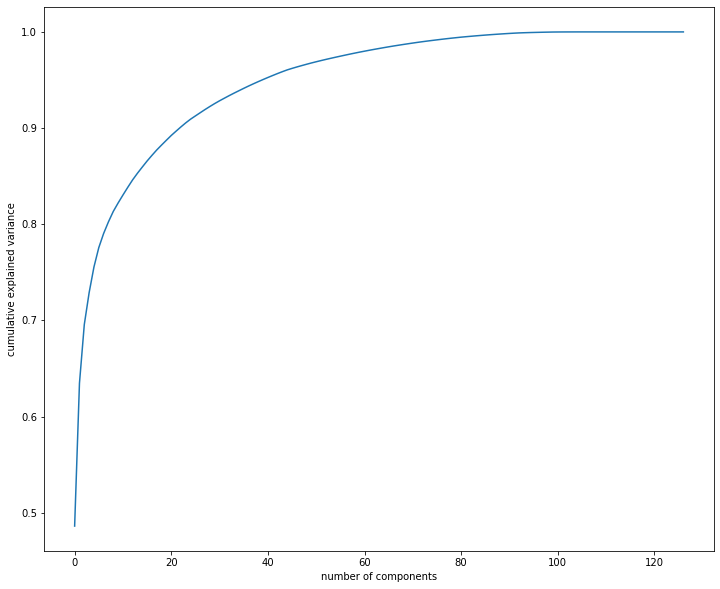

In [84]:
#Making the scree plot
%matplotlib inline
fig = plt.figure(figsize = (12,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [85]:
## Verifying PC and variables
colnames = list(X_train.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pca_df.head(30)

,PC1,PC2,Feature
0,0.016140,-0.047238,arpu_6
1,0.022913,0.010259,arpu_7
2,0.015323,0.057034,arpu_8
3,0.018902,-0.030588,onnet_mou_6
4,0.020788,0.002692,onnet_mou_7
5,0.019103,0.032003,onnet_mou_8
6,0.020147,-0.037386,offnet_mou_6
7,0.023296,0.001583,offnet_mou_7
8,0.018618,0.043413,offnet_mou_8
9,-0.001787,-0.000474,roam_ic_mou_6


In [86]:
# Around 30 Variables explaning the 90% variance.
pca = PCA(n_components=30, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_train_pca.shape

(27641, 30)

In [87]:
y_train.shape

(27641,)

In [88]:
#Test Data Transform:
X_test_pca = pca.transform(X_test)
X_test_pca.shape

X_test_unseen_pca = pca.transform(X_test_unseen)

# Different Model Building 

In [89]:
def evaluate_model(actual, pred):
    # Accuracy Score
    acc_score = round(accuracy_score(actual, pred)*100,2)
    print('Accuracy Score : ',acc_score)
    # ROC AUC score
    roc_score = round(roc_auc_score(actual, pred)*100,2)
    print('ROC AUC score : ',roc_score)
    # Precision score
    prec_score = round(precision_score(actual, pred)*100,2)
    print('Precision score : ', prec_score)
    # Recall score
    rec_score = round(recall_score(actual, pred)*100,2)
    print('Recall score : ', rec_score)

    return acc_score, roc_score, prec_score, rec_score

## Logistic Regression with PCA

In [90]:
#training the regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_pca,y_train)
y_pred = lr_model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

model_metric_list = []
model_metric_list.append({'model_name':'LogisticRegression with PCA', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})
model_metric_list

Accuracy Score :  80.9
ROC AUC score :  80.9
Precision score :  80.69
Recall score :  81.39


[{'model_name': 'LogisticRegression with PCA',
  'acc_score': 80.9,
  'roc_score': 80.9,
  'precision_score': 80.69,
  'recall_score': 81.39}]

## Decision Tree with PCA

In [91]:
# initialize the Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
# fit the pca training data
dt_model.fit(X_train_pca, y_train)
# predict the pca testing data
y_pred = dt_model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)
# add the model scores to score list
model_metric_list.append({'model_name':'DecisionTree with PCA', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})
model_metric_list

Accuracy Score :  86.45
ROC AUC score :  86.45
Precision score :  85.13
Recall score :  88.44


[{'model_name': 'LogisticRegression with PCA',
  'acc_score': 80.9,
  'roc_score': 80.9,
  'precision_score': 80.69,
  'recall_score': 81.39},
 {'model_name': 'DecisionTree with PCA',
  'acc_score': 86.45,
  'roc_score': 86.45,
  'precision_score': 85.13,
  'recall_score': 88.44}]

## RandomForest with PCA

In [92]:
# initialize the randomforest
rf_model = RandomForestClassifier(random_state=42)
# fit the pca training data
rf_model.fit(X_train_pca, y_train)
# predict the pca testing data
y_pred = rf_model.predict(X_test_pca)

# predict the Unseen testing data : X_test_unseen
y_pred_unseen = rf_model.predict(X_test_unseen_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)
# add the model scores to score list
model_metric_list.append({'model_name':'RandomForest with PCA', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})
model_metric_list

Accuracy Score :  94.93
ROC AUC score :  94.92
Precision score :  93.92
Recall score :  96.11


[{'model_name': 'LogisticRegression with PCA',
  'acc_score': 80.9,
  'roc_score': 80.9,
  'precision_score': 80.69,
  'recall_score': 81.39},
 {'model_name': 'DecisionTree with PCA',
  'acc_score': 86.45,
  'roc_score': 86.45,
  'precision_score': 85.13,
  'recall_score': 88.44},
 {'model_name': 'RandomForest with PCA',
  'acc_score': 94.93,
  'roc_score': 94.92,
  'precision_score': 93.92,
  'recall_score': 96.11}]

## XGBoosting with PCA

In [93]:
# Initialize the XGBoost
#xg_model = XGBClassifier(random_state=42)
# fit the pca training data
#xg_model.fit(X_train_pca, y_train)
# predict the pca testing data
#Y_pred = model.predict(X_test_pca)

# Model evaluation
#acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)
# add the model scores to score list
#model_metric_list.append({'model_name':'XGBoosting with PCA', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})
#model_metric_list

## Logistic Regression

In [94]:
#training the regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

model_metric_list.append({'model_name':'LogisticRegression', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})
model_metric_list

Accuracy Score :  83.19
ROC AUC score :  83.18
Precision score :  82.75
Recall score :  83.98


C:\Users\Uttam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[{'model_name': 'LogisticRegression with PCA',
  'acc_score': 80.9,
  'roc_score': 80.9,
  'precision_score': 80.69,
  'recall_score': 81.39},
 {'model_name': 'DecisionTree with PCA',
  'acc_score': 86.45,
  'roc_score': 86.45,
  'precision_score': 85.13,
  'recall_score': 88.44},
 {'model_name': 'RandomForest with PCA',
  'acc_score': 94.93,
  'roc_score': 94.92,
  'precision_score': 93.92,
  'recall_score': 96.11},
 {'model_name': 'LogisticRegression',
  'acc_score': 83.19,
  'roc_score': 83.18,
  'precision_score': 82.75,
  'recall_score': 83.98}]

## Decision Tree

In [95]:
# initialize the Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
# fit the pca training data
dt_model.fit(X_train, y_train)
# predict the pca testing data
y_pred = dt_model.predict(X_test)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)
# add the model scores to score list
model_metric_list.append({'model_name':'DecisionTree', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})
model_metric_list

Accuracy Score :  92.71
ROC AUC score :  92.7
Precision score :  91.61
Recall score :  94.08


[{'model_name': 'LogisticRegression with PCA',
  'acc_score': 80.9,
  'roc_score': 80.9,
  'precision_score': 80.69,
  'recall_score': 81.39},
 {'model_name': 'DecisionTree with PCA',
  'acc_score': 86.45,
  'roc_score': 86.45,
  'precision_score': 85.13,
  'recall_score': 88.44},
 {'model_name': 'RandomForest with PCA',
  'acc_score': 94.93,
  'roc_score': 94.92,
  'precision_score': 93.92,
  'recall_score': 96.11},
 {'model_name': 'LogisticRegression',
  'acc_score': 83.19,
  'roc_score': 83.18,
  'precision_score': 82.75,
  'recall_score': 83.98},
 {'model_name': 'DecisionTree',
  'acc_score': 92.71,
  'roc_score': 92.7,
  'precision_score': 91.61,
  'recall_score': 94.08}]

## RandomForest

In [96]:
# initialize the randomforest
rf_model = RandomForestClassifier(random_state=42)
# fit the pca training data
rf_model.fit(X_train, y_train)
# predict the pca testing data
y_pred = rf_model.predict(X_test)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)
# add the model scores to score list
model_metric_list.append({'model_name':'RandomForest', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})
model_metric_list

Accuracy Score :  97.16
ROC AUC score :  97.16
Precision score :  96.58
Recall score :  97.81


[{'model_name': 'LogisticRegression with PCA',
  'acc_score': 80.9,
  'roc_score': 80.9,
  'precision_score': 80.69,
  'recall_score': 81.39},
 {'model_name': 'DecisionTree with PCA',
  'acc_score': 86.45,
  'roc_score': 86.45,
  'precision_score': 85.13,
  'recall_score': 88.44},
 {'model_name': 'RandomForest with PCA',
  'acc_score': 94.93,
  'roc_score': 94.92,
  'precision_score': 93.92,
  'recall_score': 96.11},
 {'model_name': 'LogisticRegression',
  'acc_score': 83.19,
  'roc_score': 83.18,
  'precision_score': 82.75,
  'recall_score': 83.98},
 {'model_name': 'DecisionTree',
  'acc_score': 92.71,
  'roc_score': 92.7,
  'precision_score': 91.61,
  'recall_score': 94.08},
 {'model_name': 'RandomForest',
  'acc_score': 97.16,
  'roc_score': 97.16,
  'precision_score': 96.58,
  'recall_score': 97.81}]

In [97]:
y_pred_unseen

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [98]:
y_pred_unseen[0:40]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [99]:
df_churn_test_id.shape

(30000, 1)

In [100]:
df_test = pd.DataFrame(y_pred_unseen)

In [101]:
df_test.shape

(30000, 1)

In [102]:
df_test.head()

,0
0,0
1,0
2,1
3,0
4,0


In [103]:
df_test.rename( columns={0:'churn_probability'}, inplace=True )

In [104]:
df_test.head()

,churn_probability
0,0
1,0
2,1
3,0
4,0


In [105]:
df_solution = pd.DataFrame()

In [106]:
df_solution['id'] =   df_churn_test_id[['id']].copy()

In [107]:
df_solution

,id
0,0
1,1
2,2
3,3
4,4
...,...
29995,29995
29996,29996
29997,29997
29998,29998


In [108]:
df_solution['churn_probability'] = df_test['churn_probability']

In [109]:
df_solution

,id,churn_probability
0,0,0
1,1,0
2,2,1
3,3,0
4,4,0
...,...,...
29995,29995,0
29996,29996,0
29997,29997,0
29998,29998,0


In [110]:
df_test['churn_probability'].value_counts()

0    27839
1     2161
Name: churn_probability, dtype: int64

In [111]:
df_solution.shape

(30000, 2)

In [115]:
df_solution.set_index(['id'], inplace = True)

In [116]:
df_solution

,churn_probability
id,
0,0
1,0
2,1
3,0
4,0
...,...
29995,0
29996,0
29997,0


In [117]:
df_solution.to_csv('solution.csv')

In [114]:
df_churn_test_id

,id
0,0
1,1
2,2
3,3
4,4
...,...
29995,29995
29996,29996
29997,29997
29998,29998
